# Pruebas Adaboost + DecisionTree

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-41:
- Más estimadores para AdaBoost, de 30 se aumentó a 50.

Cambios inducidos via grid search:
- Criterio para el split cambiado de gini a entropy
- min_samples_split aumentado de 100 a 1000

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
RANDOM_SEED = 12

In [3]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [4]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [27]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-resetd.csv')

In [6]:
TEST_SIZE_PERCENT = 0.1

In [7]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [8]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [9]:
clasificador = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
        min_samples_split=1000,
        criterion = 'entropy',
        random_state=RANDOM_SEED
    ),
    n_estimators=50,
    random_state=RANDOM_SEED
)

In [11]:
clasificador.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=12)

In [33]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [34]:
roc_auc_score(y_test, y_test_predictd)

0.9888724446707684

In [35]:
clasificador.score(X_test, y_test)

0.9602

In [36]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [37]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

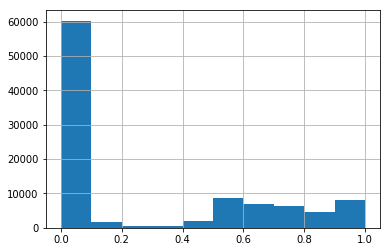

In [38]:
kaggle_out['sepostulo'].hist()

In [18]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-45-bis.csv', index=False)

In [24]:
kaggle_45 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-45.csv')

In [31]:
print('ROCAUC 45 vs 45:', roc_auc_score(np.round(kaggle_45['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 45 vs 45: 0.9892211326020695


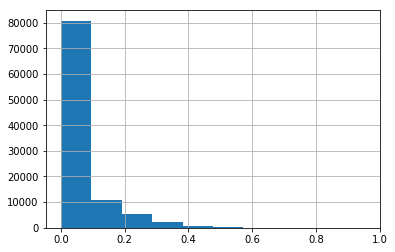

In [32]:
np.abs(kaggle_45['sepostulo'] - kaggle_out['sepostulo']).hist()

In [22]:
# kaggle score: 0.946